# **COMPETICIÓN DE KAGGLE**
# **Spaceship Titanic** 
### Predecir qué pasajeros fueron transportados a una dimensión alternativa

#### **DESCRIPCIÓN:**

Bienvenido al año 2912, donde se necesitan tus habilidades de ciencia de datos para resolver un misterio cósmico. Hemos recibido una transmisión desde cuatro años luz de distancia y las cosas no pintan bien.

La nave espacial Titanic fue un transatlántico de pasajeros interestelar lanzado hace un mes. Con casi 13.000 pasajeros a bordo, la nave emprendió su viaje inaugural transportando emigrantes de nuestro sistema solar a tres exoplanetas recientemente habitables que orbitan estrellas cercanas.

Mientras rodeaba Alpha Centauri en ruta hacia su primer destino, el tórrido 55 Cancri E, la desprevenida nave espacial Titanic chocó con una anomalía del espacio-tiempo escondida dentro de una nube de polvo. Lamentablemente, tuvo un destino similar al de su homónimo de 1000 años antes. Aunque la nave permaneció intacta, ¡casi la mitad de los pasajeros fueron transportados a una dimensión alternativa!

Para ayudar a las tripulaciones de rescate y recuperar a los pasajeros perdidos, debe predecir qué pasajeros fueron transportados por la anomalía utilizando los registros recuperados del sistema informático dañado de la nave espacial.

¡Ayuda a salvarlos y cambia la historia!

## IMPORTACIÓN DE LIBRERIAS NECESARIAS

In [1]:
import pandas as pd
import zipfile
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

%matplotlib inline

## EXTRACCIÓN/CARGA DE DATOS

In [2]:
# Asignamos a una variable la ruta donde se encuentra el archivo zip con el dataset que vamos a trabjar
# Asignamos a otra variable el directorio donde queremos que guarde el dataset extraido de ese archivo zip

path_to_zip_file = '../data/RAW/spaceship-titanic-publicleaderboard.zip'
directory_to_extract_to = '../data/RAW'

In [3]:
# Con esta función de esta libreria importada extraemos el contenido en el zip y lo guardamos en el dorecotrio antes asignado

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [3]:
data_org = pd.read_csv("../data/RAW/train.csv")
data_train = pd.read_csv("../data/RAW/train.csv")
data_test = pd.read_csv("../data/RAW/test.csv")

## **Resumen exploratorio sobre datos**

In [4]:
print(f'Filas y Columnas del train: {data_train.shape}')
print(f'Filas y Columnas del test: {data_test.shape}')

Filas y Columnas del train: (8693, 14)
Filas y Columnas del test: (4277, 13)


In [5]:
print(f'COLUMNAS DEL TRAIN: {data_train.columns.values}')

print('\n')

print(f'COLUMNAS DEL TEST: {data_test.columns.values}')


COLUMNAS DEL TRAIN: ['PassengerId' 'HomePlanet' 'CryoSleep' 'Cabin' 'Destination' 'Age' 'VIP'
 'RoomService' 'FoodCourt' 'ShoppingMall' 'Spa' 'VRDeck' 'Name'
 'Transported']


COLUMNAS DEL TEST: ['PassengerId' 'HomePlanet' 'CryoSleep' 'Cabin' 'Destination' 'Age' 'VIP'
 'RoomService' 'FoodCourt' 'ShoppingMall' 'Spa' 'VRDeck' 'Name']


In [16]:
data_train.head(10)

PassengerId HomePlanet CryoSleep  Cabin    Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P    TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S    TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S    TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S    TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S    TRAPPIST-1e  16.0  False   
5     0005_01      Earth     False  F/0/P  PSO J318.5-22  44.0  False   
6     0006_01      Earth     False  F/2/S    TRAPPIST-1e  26.0  False   
7     0006_02      Earth      True  G/0/S    TRAPPIST-1e  28.0  False   
8     0007_01      Earth     False  F/3/S    TRAPPIST-1e  35.0  False   
9     0008_01     Europa      True  B/1/P    55 Cancri e  14.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck                Name  \
0          0.0        0.0           0.0     0.0     0.0     Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0        Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0       Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0        Solam Susent   
4        303.0       70.0         151.0   565.0     2.0   Willy Santantines   
5          0.0      483.0           0.0   291.0     0.0   Sandie Hinetthews   
6         42.0     1539.0           3.0     0.0     0.0  Billex Jacostaffey   
7          0.0        0.0           0.0     0.0     NaN  Candra Jacostaffey   
8          0.0      785.0          17.0   216.0     0.0       Andona Beston   
9          0.0        0.0           0.0     0.0     0.0      Erraiam Flatic   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  
5         True  
6         True  
7         True  
8         True  
9         True

In [5]:
data_test.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

#### Con la siguiente función vamos a ver cómo son los datos de los que se componen cada una de las variables que tenemos en los datos

In [6]:
for i in data_train.columns:
    print(str(i) + ':' + str(data_train[i].unique()) + '\n' )

PassengerId:['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']

HomePlanet:['Europa' 'Earth' 'Mars' nan]

CryoSleep:[False True nan]

Cabin:['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']

Destination:['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]

Age:[39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]

VIP:[False True nan]

RoomService:[   0.  109.   43. ... 1569. 8586.  745.]

FoodCourt:[   0.    9. 3576. ... 3208. 6819. 4688.]

ShoppingMall:[   0.   25.  371. ... 1085.  510. 1872.]

Spa:[   0.  549. 6715. ... 2868. 1107. 1643.]

VRDeck:[   0.   44.   49. ... 1164.  971. 3235.]

Name:['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh

### **Tipos de datos**

In [7]:
print(f'TIPOS DE DATOS SEGÚN COLUMNA:\n{data_train.dtypes}')

TIPOS DE DATOS SEGÚN COLUMNA:
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


#### Necesitaremos transformar los datos para que sean numéricos, para que podamos más adelante entrenar los modelos de Machine Learning

-----------------------------------

### **Valores missing**

In [15]:
print(f"VALORES NULOS/MISSING:\n{data_train.isna().sum()}")

VALORES NULOS/MISSING:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [12]:
print(f"Valores missing de los datos del train:\n{data_train.isna().sum()}")

Valores missing de los datos del train:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [13]:
print(f"Valores missing de los datos del test:\n{data_test.isna().sum()}")

Valores missing de los datos del test:
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


#### Practicamente todas las variables contienen valores NaN. Será importante más adelante elegir la forma correcta de procesar estos valores.



------------------------------------------------------------------------------


### **Valores únicos**

#### Identificamos los valores únicos para las todas las variables de los datos que vamos a trabajar

In [16]:
print(f"VALORES ÚNICOS:\n{data_train.nunique()}")

VALORES ÚNICOS:
PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64


# **EDA**

### PRIMERO REALIZAMOS UN ANÁLISIS EXPLORATORIO DE LOS DATOS CON LOS QUE VAMOS A TRABAJAR

#### En el Análisis Exploratorio de Datos (EDA), analizaremos más de cerca cada variable del conjunto de datos con el que vamos a trabajar, exploraremos sus distribuciones, anomalías, correlaciones y otras especificidades.

### **Vamos a arrojar una breve descripción de las variables a explorar:**

**PassengerId**: Se trata de una identificación única para cada pasajero. Cada Id toma la forma gggg_pp donde gggg indica el grupo con el que viaja el pasajero, y pp es su número dentro del grupo. Las personas en un grupo a menudo son miembros de la familia, pero no siempre.

**HomePlanet**: El planeta del que partió el pasajero, normalmente su planeta de residencia permanente.

**CryoSleep**: Indica si el pasajero eligió que se le ponga en 'animación suspendida' durante la duración del viaje. Los pasajeros en criosueño están confinados en sus cabinas.

**Cabin**: El número de cabina donde se hospeda el pasajero. Toma la forma deck/num/side, donde el lado puede ser 'P' para babor, o 'S' para estribor.

**Destination**: El planeta en el que desembarcará el pasajero.

**Age**: La edad del pasajero.

**VIP**: Si el pasajero ha pagado por un servicio VIP durante el viaje.

**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck**: La cantidad que el pasajero ha facturado en cada uno de los muchos servicios de lujo del Spaceship Titanic.

**Name**: El nombre y apellido del pasajero.

**Transported**: Si el pasajero fue transportado a otra dimensión. Este es el target, la columna que trataremos de predecir.

--------------

### Identificamos el tipo de las variables que tenemos en los datos

Identificar las columnas categóricas, numéricas, y en el caso de este DataSet tambien variables con valores binarios

**Variables Numéricas**

1. Age
2. Room Service
3. FoodCourt
4. Shopping Mall
5. Spa
6. VR Deck

**Variables Categóricas**

1. Homeplanet
2. PassenderId
3. Name
4. Cabin
5. Destination

**Variables Booleanas**

1. VIP
2. CryoSleep
3. Transported

In [17]:
TARGET = ['Transported']
cat_var = ['HomePlanet', 'Cabin', 'Destination', 'VIP', 'CryoSleep', 'Transported'] 

#### Identificamos los valores únicos para las columnas categóricas

In [18]:
cat_unique = [data_train.loc[:,column].unique() for column in cat_var]

In [19]:
for i, value in enumerate(cat_unique):
    print(f'Hay {len(value)} valores únicos en la columna {cat_var[i]}:')
    print(f'{value}\n')

Hay 4 valores únicos en la columna HomePlanet:
['Europa' 'Earth' 'Mars' nan]

Hay 6561 valores únicos en la columna Cabin:
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']

Hay 4 valores únicos en la columna Destination:
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]

Hay 3 valores únicos en la columna VIP:
[False True nan]

Hay 3 valores únicos en la columna CryoSleep:
[False True nan]

Hay 2 valores únicos en la columna Transported:
[False  True]



-------

## Exploración & Visualización de datos

#### Antes de codificar los valores, repasemos la visualización de datos para comprender los datos. Revisemos las columnas individualmente y con algunas también como se relacionan con el target.

### **Variable Target**

In [23]:
fig = px.pie(names = data_train.Transported.unique(), 
values = data_train.Transported.value_counts(), 
width = 500, 
hole = 0.4)

fig.update_layout({'title':{'text':'Distribución del Target','x':0.48}})
fig.show();

En el gráfico podemos observar que el target tiene casi el mismo número de valores verdaderos y falsos, por lo que está muy balanceado/equilibrado. Esto en principio, simplificará la evaluación de los modelos de Machine Learning. 

### **Variables:**

#### HomePlanet

In [24]:
px.histogram(data_train, 
x = 'HomePlanet', 
color = 'Transported', 
barmode = "stack", 
width = 550, 
height = 550, 
title = "Home PLanet").update_xaxes(categoryorder = 'total descending')

Viendo la gáfica podemos observar varias cosas. Una es, que más del 55% de los pasajeros transportados provienen del planeta Tierra.

También podemos observar que el número de personas que sobrevivieron, tanto para Europa como para Marte, es mayor que el número de personas que murieron. Mientras que el caso de la Tierra ocurre totalmente lo contrario. 

Conclusión: Siendo el planeta la Tierra de donde más pasajeros provienen, podemos probar a usarlo como "moda" para completar los valores faltantes. Si vemos que no nos ha salido bien la jugada, probaremos con otra estrategia. 

#### CryoSleep

In [25]:
fig = px.pie(names = data_train.CryoSleep.unique()[:-1], 
values = data_train.CryoSleep.value_counts(), 
width = 500, 
hole = 0.4)

fig.update_layout({'title':{'text':'Cryo Sleep','x':0.5}})
fig.show();

En este gráfico podemos ver que la gran mayoría de los pasajeros no estaban en Cryo Sleep en el momento choque, es de esperar que aquellos que no estaban en ese momento en Cryo Sleep tuvieran más posibilidades de sobrevivir, y fueran los que se transportaron a otra dimensión.

In [26]:
px.histogram(data_train, x = 'CryoSleep', 
color = 'Transported', 
barmode = 'stack', 
width = 550, 
height = 550, 
title = "Cryo Sleep").update_xaxes(categoryorder = 'total descending')

Sin embargo, si observamos el gráfico cuando se trata de quién sobrevivió siendo transportados, los que estaban durmiendo sobrevivieron más, el 35,8% de las personas que optaron por el criosueño, la mayoría fueron trasportados. Esto es algo bastante interesante y que disminuye la incertidumbre sobre el target, porque la mayoría de los pasajeros con CryoSleep aparecen como Verdadero en su transportación.

CryoSleep parece ser una variable muy útil y muy correlacionada con el target

#### VIP

In [27]:
fig = px.pie(names = data_train.VIP.unique()[:-1], 
values = data_train.VIP.value_counts(), 
width = 500, 
hole = 0.4)

fig.update_layout({'title':{'text':'VIP','x':0.48}})
fig.show();

In [28]:
px.histogram(data_train, 
x = 'VIP', 
color = 'Transported', 
barmode = 'stack', 
width = 600, 
height = 600, 
title = "VIP")

La mayoría de los pasajeros (97,5 %) no son VIP, pero la división del target es más o menos la misma, es decir, 50 % transportados y 50 % no. La variable VIP no parece ser muy útil. La división de los valores está totalmente desvalanceada, y nos nos arroja nada relevante. Podríamos eliminar la variable VIP para evitar overfitting más adelante. Puede que sea una buena opción.

#### Destination

In [29]:
fig = px.pie(names = data_train.Destination.unique()[:-1], 
values = data_train.Destination.value_counts(), 
width = 500, 
hole = 0.4)

fig.update_layout({'title':{'text':'Destination','x':0.45}})
fig.show();

In [30]:
px.histogram(data_train, 
x = 'Destination', 
color = 'Transported', 
barmode = 'stack', 
width = 575, 
height = 575, 
title = "Destination")

Viendo ambos gráficos podemos observar que "TRAPPIST-1e" tiene una cantidad mayor de pasajeros transportados con respecto a los otros dos destinos, alrededor del 69,5% de las personas, por eso mismo tiene la mayor cantidad de pasajeros que fueron transportados y al mismo tiempo que no fueron transportados. Aunque tambien podemos ver y debemos tener en cuenta, es que los otros 2 destinos tienen un mayor número de personas que sobrevivieron durante el choque de la nave.

#### Age

In [31]:
px.histogram(data_train, 
x = 'Age', 
color = 'Transported', 
barmode = 'group', 
width = 1150, 
height = 600, 
title = "Age", 
opacity= 0.7, 
color_discrete_map = {0:'blue',1:'orange'})

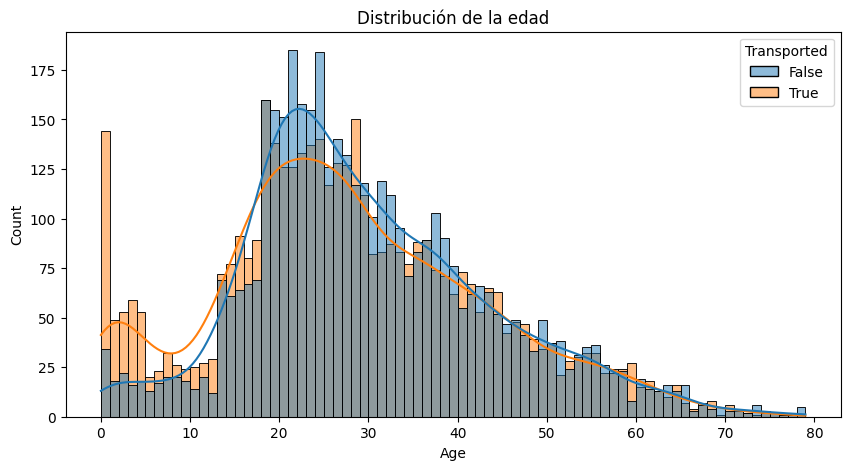

In [32]:
plt.figure(figsize = (10, 5))

sns.histplot(data_train, 
x="Age", 
hue="Transported", 
binwidth=1, 
kde=True)

plt.title('Distribución de la edad')
plt.show();

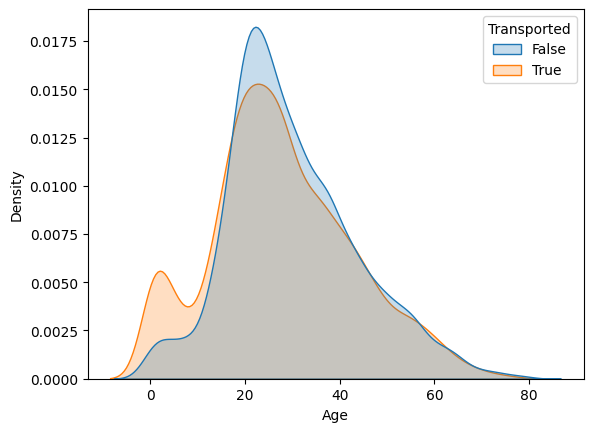

In [33]:
sns.kdeplot(x = data_train.Age, 
hue = data_train.Transported, 
fill = True)

plt.show();

Aquí observaremos pequeñas diferencias respecto a los datos procesados, ya que a esta variable sin procesada contiene muchos valores missing. Tendremos que ver cómo vamos a arreglar eso. Una opción sería darle los valores promedio de la variable.

Podemos suponer viendo el gráfico, que los niños entre 0 y 5 años, sobrevivieron mucho más, podemos suponer porque se les priorizó para ser transportados. Después los de 5 a 18 años tuvieron tambien una alta probabilidad de sobrevivir. En cambio las personas en el rango de edad entre 18 y 26 años tenían menos posibilidades de ser transportados, y de 25 años en adelante igual, tuvieron una probabilidad baja o muy baja de ser trasportados. 

Sería interesante transformar los valores de la variable a categórica, y hacer grupos de edades. En plan "niño", "adolescente", "adulto" y "anciano".

--------

### **CORRELACIONES ENTRE VARIABLES**

#### Ahora vamos a ver las correlaciones entre algunas de las variables que me parecen que pueden ser más interesantes o relevantes a la hora de tener en cuenta para su procesamiento

####  Transported & CryoSleep

In [38]:
TrasCryo = data_train.groupby(['Transported','CryoSleep'])['CryoSleep'].size().unstack().fillna(0)
TrasCryo.head()

CryoSleep    False  True
Transported             
False         3650   554
True          1789  2483

In [39]:
px.imshow(TrasCryo, 
text_auto = True)

####  Transported & HomePlanet

In [34]:
TrasHom = data_train.groupby(['Transported','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
TrasHom.head()

HomePlanet   Earth  Europa  Mars
Transported                     
False         2651     727   839
True          1951    1404   920

In [35]:
px.imshow(TrasHom, 
text_auto = True)

#### Destination & HomePlanet

In [36]:
DesHom = data_train.groupby(['Destination','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
DesHom.head()

HomePlanet     Earth  Europa  Mars
Destination                       
55 Cancri e      690     886   193
PSO J318.5-22    712      19    49
TRAPPIST-1e     3101    1189  1475

In [37]:
px.imshow(DesHom, 
text_auto = True)

La mayoría de las personas que se dirigían hacia TRAPPIST-1e procedían de la Tierra.

####  Transported & Age

In [40]:
TransAge = data_train.groupby(['Transported','Age'])['Age'].size().unstack().fillna(0)

In [41]:
px.imshow(TransAge, 
text_auto = True)

### **Vamos a visualizar los valores **missing** dentro de cada variable del dataset**

In [42]:
print(f"VALORES NULOS/MISSING:\n{data_train.isna().sum()}")

VALORES NULOS/MISSING:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [44]:
px.imshow(data_train.isna(), 
title = "Heatmap de Valores Nulos o Missing (Train)")

In [45]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [46]:
tot_col = data_train.columns

for col in tot_col:
    print(f'{col}: tiene {data_train[col].isna().sum()} valores NaN y {data_train[col].nunique()} valores únicos')

PassengerId: tiene 0 valores NaN y 8693 valores únicos
HomePlanet: tiene 201 valores NaN y 3 valores únicos
CryoSleep: tiene 217 valores NaN y 2 valores únicos
Cabin: tiene 199 valores NaN y 6560 valores únicos
Destination: tiene 182 valores NaN y 3 valores únicos
Age: tiene 179 valores NaN y 80 valores únicos
VIP: tiene 203 valores NaN y 2 valores únicos
RoomService: tiene 181 valores NaN y 1273 valores únicos
FoodCourt: tiene 183 valores NaN y 1507 valores únicos
ShoppingMall: tiene 208 valores NaN y 1115 valores únicos
Spa: tiene 183 valores NaN y 1327 valores únicos
VRDeck: tiene 188 valores NaN y 1306 valores únicos
Name: tiene 200 valores NaN y 8473 valores únicos
Transported: tiene 0 valores NaN y 2 valores únicos


In [47]:
print(f"VALORES NULOS/MISSING TEST:\n{data_test.isna().sum()}")

VALORES NULOS/MISSING TEST:
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [48]:
px.imshow(data_test.isna(), 
title = "Heatmap de Valores Nulos o Missing (Test)")

In [49]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


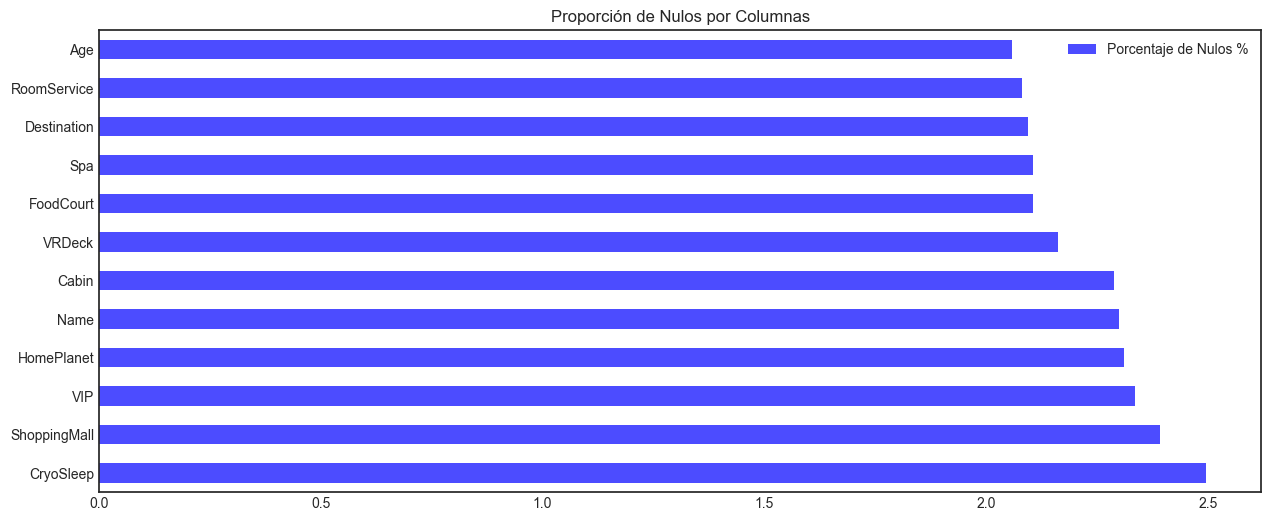

In [53]:
plt.style.use("seaborn-white")

def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Porcentaje de Nulos %' :na_df})
        missing_data.plot(kind = "barh", 
        title = "Proporción de Nulos por Columnas", 
        color = 'blue', 
        alpha = 0.7, 
        figsize = (15, 6))
        plt.show()
    else:
        print('No Nas found')
plot_nas(data_train)

Podemos observar que tenemos muchos valores NaN, o missing. Solucionar esto será nuestra prioridad para así poder tratar con los datos de una forma correcta. 

Tenemos dos alternativas para este problema. Una será eliminar todos los valores NaN directamente, o bien, la segunda opción sería sustituirlos con valores nosotros mismos, es decir, "rellenamos los espacios sin datos, o datos nulos".

La primera opción es un poco arriegada a priori, asi que vamos a utilizar la segunda opción. Para ello necesitaremos convertir todos los datos de todas la variables que no sean numéricas a tipo numérico, entre otras cosas. 

**Comencemos!!**